<a href="https://colab.research.google.com/github/viswambhar-yasa/Health_insurance_predictor/blob/main/Insurance_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
# importing important libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras as tfk
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

In [152]:
print('TensorFlow Version')
print(tf.__version__)
tf.random.set_seed(60)

TensorFlow Version
2.5.0


In [153]:
### importing kaggle dataset
data=pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Preprocessing
1. Extraction 
2. Normalization

In [154]:
# Encoding
encode_data=pd.get_dummies(data)
encode_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [155]:
# Normalization and splitting of datasets
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=encode_data.drop("charges",axis=1)
Y=encode_data["charges"]
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X_tr,X_test,Y_tr,Y_test=train_test_split(X,Y,test_size=0.25,random_state=True)

In [156]:
print('Number of input features ')
print(X_tr.shape)
print(Y_tr.shape)

Number of input features 
(1003, 11)
(1003,)


# Creating deep NN model

In [157]:
insurance_model=tfk.Sequential([
                                tfk.layers.Dense(100,input_shape=[11,],name='hidden_layer_1',activation='relu'),
                                tfk.layers.Dense(50,input_shape=[100,],name='hidden_layer_2',activation='relu'),
                                tfk.layers.Dense(1,input_shape=[50,],name='output_layer')
],name="insurance_prediction_model")

insurance_model.compile(loss=tfk.losses.mae,
                        optimizer=tfk.optimizers.Adam(learning_rate=0.01))

model_hist=insurance_model.fit(X_tr,Y_tr,epochs=100,verbose=0)

In [158]:
insurance_model.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 2ms/step - loss: 1831.0826


1831.0826416015625

Text(0, 0.5, 'loss')

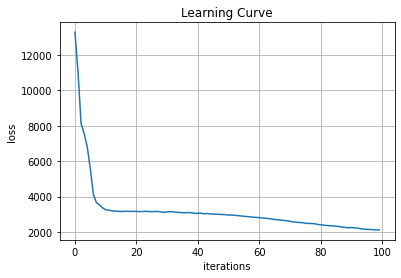

In [159]:
plt.plot(model_hist.epoch,model_hist.history["loss"])
plt.title('Learning Curve')
plt.grid()
plt.xlabel('iterations')
plt.ylabel('loss')

# Improving the NN model
1. Increasing the number of hidden layers and units
2. changing learning rate
3. changing metrics

In [160]:
insurance_model_1=tfk.Sequential([
                                tfk.layers.Dense(100,input_shape=[11,],name='hidden_layer_1',activation='relu'),
                                #tfk.layers.Dense(100,input_shape=[100,],name='hidden_layer_2',activation='relu'),
                                tfk.layers.Dense(50,input_shape=[100,],name='hidden_layer_2',activation='relu'),
                                tfk.layers.Dense(20,input_shape=[50,],name='hidden_layer_3',activation='relu'),
                                tfk.layers.Dense(10,input_shape=[20,],name='hidden_layer_4',activation='relu'),
                                tfk.layers.Dense(1,input_shape=[10,],name='output_layer')
],name="insurance_prediction_model_1")

insurance_model_1.compile(loss=tfk.losses.mae,
                        optimizer=tfk.optimizers.Adam(learning_rate=0.01))

model_hist_1=insurance_model_1.fit(X_tr,Y_tr,epochs=100,verbose=0)

In [161]:
insurance_model_1.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 1ms/step - loss: 1852.6261


1852.6260986328125

Text(0, 0.5, 'loss')

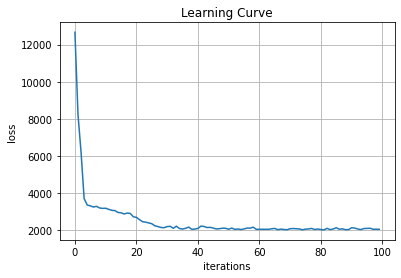

In [162]:
plt.plot(model_hist_1.epoch,model_hist_1.history["loss"])
plt.title('Learning Curve')
plt.grid()
plt.xlabel('iterations')
plt.ylabel('loss')

In [164]:
Y_predict=insurance_model_1.predict(X_test)
print("Predicted medical expenses :",Y_predict[:5,0])
print("Actual medical expenses :",Y_test.head().to_numpy())

Predicted medical expenses [ 1784.9939 11316.986   8791.014  10337.671   2197.1152]
Actual medical expenses [ 1646.4297 11353.2276  8798.593  10381.4787  2103.08  ]


In [165]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
insurance_model_1.summary()

Model: "insurance_prediction_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 100)               1200      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 50)                5050      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 20)                1020      
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 10)                210       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 7,491
Trainable params: 7,491
Non-trainable params: 0
_________________________________________________________________


In [167]:
insurance_model_1.save("Insurance_prediction_model.h5")

### By predicting the medical expenses, one can predict the preminum of his insurance
The data is obtained from kaggle and is open source